<a href="https://colab.research.google.com/github/himanshuraimau/ai_learnings/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('placement_data.csv')

In [49]:
df

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
90,"4,3",200.0,No
91,"4,4",42.0,No
92,"6,7",182.0,Yes
93,"6,3",103.0,Yes


In [50]:
df.shape

(95, 3)

In [51]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [52]:
import matplotlib.pyplot as plt

In [53]:
df['cgpa'] = df['cgpa'].str.replace(',', '.').astype(float)


In [54]:
df['placement'] = df['placement'].map({'Yes': 1, 'No': 0})


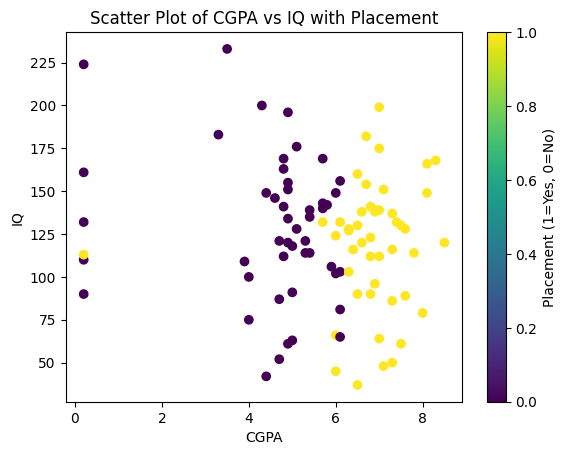

In [55]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='viridis')
plt.colorbar(label='Placement (1=Yes, 0=No)')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ with Placement')
plt.show()


In [56]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [57]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
90,4.3,200.0
91,4.4,42.0
92,6.7,182.0
93,6.3,103.0


In [58]:
y


,placement
0,1
1,0
2,0
3,1
4,0
...,...
90,0
91,0
92,1
93,1


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train

array([[ 0.33852999,  0.08391483],
       [-0.40336815, -1.57544266],
       [-2.89402621,  0.18298095],
       [ 0.02057365,  0.45541278],
       [ 0.70947907, -1.50114307],
       [-0.40336815,  1.76803885],
       [ 0.70947907, -0.31234965],
       [-0.9332954 , -0.38664923],
       [ 0.60349362, -0.31234965],
       [-0.13840453, -0.26281659],
       [-0.5093536 , -0.93151289],
       [-2.89402621, -0.28758312],
       [ 0.60349362, -0.03991782],
       [ 0.23254454, -1.08011207],
       [-0.88030267, -1.22871124],
       [ 0.1265591 , -0.46094882],
       [-0.35037543, -1.5259096 ],
       [ 0.02057365,  1.09934255],
       [-0.2973827 ,  1.27270826],
       [-0.40336815,  0.75261113],
       [ 0.86845724, -0.21328353],
       [ 0.86845724,  0.3068136 ],
       [ 0.86845724, -0.95627942],
       [-2.89402621, -0.3618827 ],
       [ 0.60349362,  0.40587972],
       [ 0.39152272, -0.21328353],
       [-0.45636088, -0.31234965],
       [ 0.33852999,  0.0591483 ],
       [-0.40336815,

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression()

In [68]:
clf.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_pred = clf.predict(X_test)

In [70]:
y_test

,placement
89,0
35,0
21,0
20,1
75,1
26,1
47,1
17,0
83,1
23,0


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,y_pred)

0.9

In [74]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

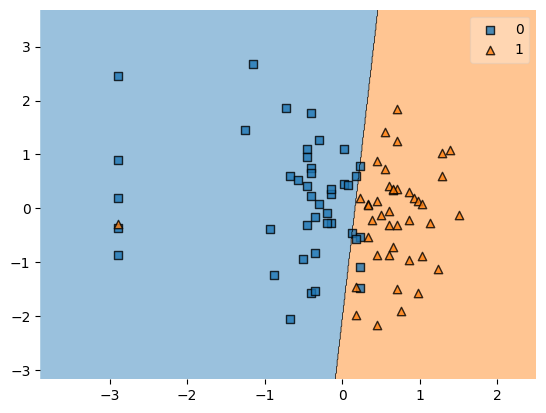

In [75]:
plot_decision_regions(X=X_train,y=y_train.values,clf=clf)

In [76]:
import pickle

In [77]:
pickle.dump(clf,open('model.pkl','wb'))